#EDA ASSIGNMENT


EDA-1: Bike Details Dataset

In [3]:
#1) What is the range of selling prices in the dataset?
import pandas as pd

# Load dataset
df = pd.read_csv('bike_details_dataset.csv')

# Find the range
selling_price_range = df['selling_price'].max() - df['selling_price'].min()
selling_price_range


755000

In [4]:
#2) What is the median selling price for bikes in the dataset?
median_price = df['selling_price'].median()
median_price


45000.0

In [5]:
#3)  What is the most common seller type?
most_common_seller = df['seller_type'].mode()[0]
most_common_seller


'Individual'

In [7]:
#4) How many bikes have driven more than 50,000 kilometers?
bikes_above_50000 = df[df['km_driven'] > 50000].shape[0]
bikes_above_50000



170

In [8]:
#5)  What is the average km_driven value for each ownership type?
avg_km_by_owner = df.groupby('owner')['km_driven'].mean()
avg_km_by_owner


,km_driven
owner,
1st owner,32816.583333
2nd owner,39288.991870
3rd owner,33292.181818
4th owner,311500.000000


In [9]:
#6)What proportion of bikes are from the year 2015 or older?
bikes_2015_or_older = df[df['year'] <= 2015].shape[0]
proportion = bikes_2015_or_older / df.shape[0]
proportion


0.5664467483506126

In [10]:
#7) What is the trend of missing values across the dataset?
missing_values = df.isnull().sum()
missing_values


,0
name,0
selling_price,0
year,0
seller_type,0
owner,0
km_driven,0
ex_showroom_price,435


In [11]:
#8) What is the highest ex_showroom_price recorded, and for which bike?
highest_price_bike = df[df['ex_showroom_price'] == df['ex_showroom_price'].max()]
highest_price_bike[['name', 'ex_showroom_price']]


,name,ex_showroom_price
134,Harley-Davidson Street Bob,1278000.0


In [12]:
#9) What is the total number of bikes listed by each seller type?
total_bikes_seller_type = df['seller_type'].value_counts()
total_bikes_seller_type


,count
seller_type,
Individual,1055
Dealer,6


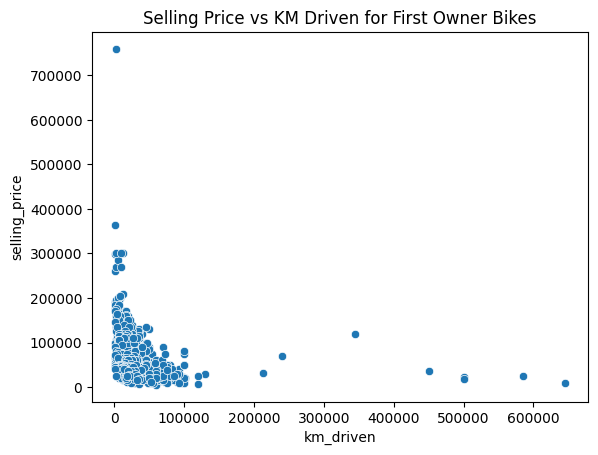

In [13]:
#10) What is the relationship between selling_price and km_driven for first-owner bikes?
import seaborn as sns
import matplotlib.pyplot as plt

first_owner_bikes = df[df['owner'] == '1st owner']
sns.scatterplot(data=first_owner_bikes, x='km_driven', y='selling_price')
plt.title('Selling Price vs KM Driven for First Owner Bikes')
plt.show()


In [14]:
#11) Identify and remove outliers in the km_driven column using the IQR method.
Q1 = df['km_driven'].quantile(0.25)
Q3 = df['km_driven'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_no_outliers = df[(df['km_driven'] >= lower_bound) & (df['km_driven'] <= upper_bound)]
df_no_outliers.shape


(1022, 7)

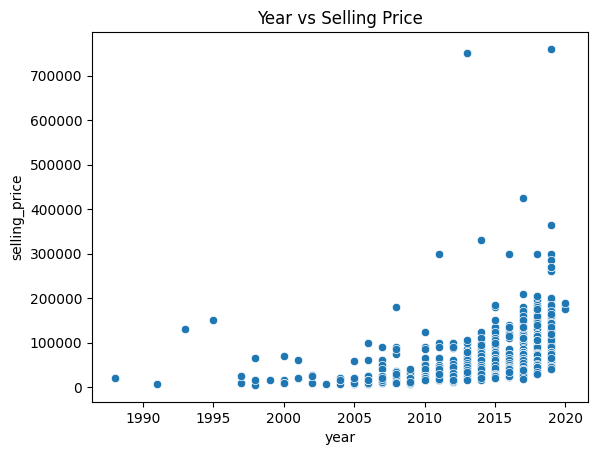

In [15]:
#12) Perform a bivariate analysis to visualize the relationship between year and selling_price.
sns.scatterplot(data=df, x='year', y='selling_price')
plt.title('Year vs Selling Price')
plt.show()


In [16]:
#13) What is the average depreciation in selling price based on the bike's age (current year - manufacturing year)?
from datetime import datetime

current_year = datetime.now().year
df['bike_age'] = current_year - df['year']
avg_depreciation = df.groupby('bike_age')['selling_price'].mean()
avg_depreciation


,selling_price
bike_age,
5,183333.333333
6,119689.511628
7,87660.374046
8,78894.736842
9,58469.018692
10,56500.000000
11,48668.131868
12,51136.986301
13,35748.400000


In [17]:
#14) Which bike names are priced significantly above the average price for their manufacturing year?
avg_price_per_year = df.groupby('year')['selling_price'].mean().reset_index()
df_merged = df.merge(avg_price_per_year, on='year', suffixes=('', '_avg'))

expensive_bikes = df_merged[df_merged['selling_price'] > 1.5 * df_merged['selling_price_avg']]
expensive_bikes[['name', 'year', 'selling_price']]


,name,year,selling_price
2,Royal Enfield Classic Gunmetal Grey,2018,150000
7,Royal Enfield Bullet 350 [2007-2011],2008,180000
13,Yamaha YZF R3,2019,365000
18,Royal Enfield Classic Gunmetal Grey,2018,150000
23,Jawa Standard,2019,180000
...,...,...,...
979,Royal Enfield Thunder 500,2015,105000
981,Royal Enfield Thunder 350,2013,105000
983,Royal Enfield Classic 350,2015,100000
984,Royal Enfield Classic 500,2014,95000


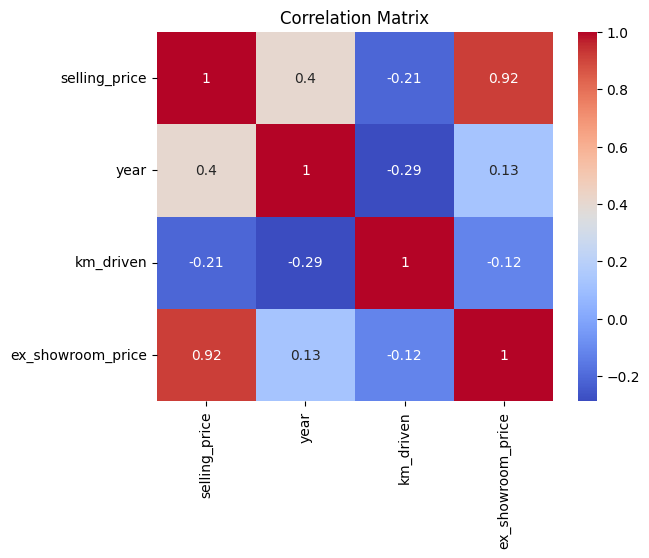

In [19]:
#15) Develop a correlation matrix for numeric columns and visualize it using a heatmap.
corr_matrix = df[['selling_price', 'year', 'km_driven', 'ex_showroom_price']].corr()

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


EDA-2: Car Sales Dataset

In [20]:
#1) What is the average selling price of cars for each dealer, and how does it compare across different dealers?
import pandas as pd

# Load the dataset
df = pd.read_csv('car_sales_dataset.csv')

# Average selling price per dealer
avg_price_dealer = df.groupby('Dealer_Name')['Price ($)'].mean().sort_values(ascending=False)
avg_price_dealer


,Price ($)
Dealer_Name,
U-Haul CO,28769.919006
Classic Chevy,28602.014446
Rabun Used Car Sales,28527.536177
Iceberg Rentals,28522.958533
Enterprise Rent A Car,28312.580800
Scrivener Performance Engineering,28297.371589
Gartner Buick Hyundai Saab,28247.621019
Saab-Belle Dodge,28190.139888
Capitol KIA,28189.703822


In [21]:
#2) Which car brand (Company) has the highest variation in prices, and what does this tell us about pricing trends?
variation_brand = df.groupby('Company')['Price ($)'].std().sort_values(ascending=False)
variation_brand


,Price ($)
Company,
Lincoln,19658.050211
Saab,19653.740089
Cadillac,19517.120220
Plymouth,19065.997338
Lexus,17852.923492
Buick,17142.232626
Mercury,16445.172195
Nissan,16214.264017
Saturn,15990.223671


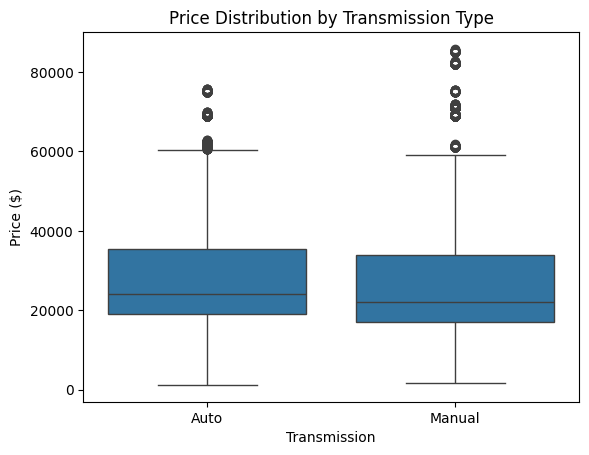

In [22]:
#3) What is the distribution of car prices for each transmission type, and how do the interquartile ranges compare?
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x='Transmission', y='Price ($)', data=df)
plt.title('Price Distribution by Transmission Type')
plt.show()


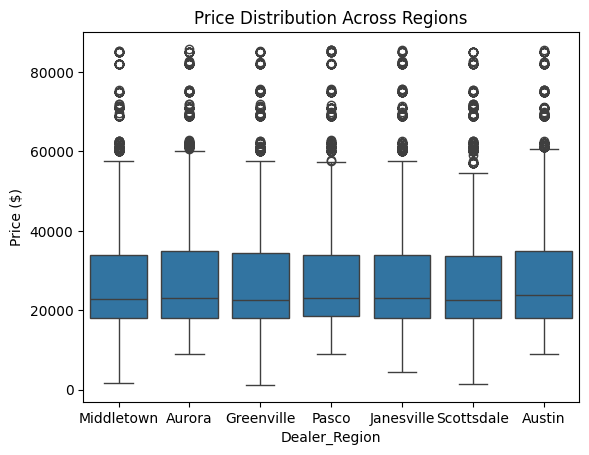

In [23]:
#4) What is the distribution of car prices across different regions?
sns.boxplot(x='Dealer_Region', y='Price ($)', data=df)
plt.title('Price Distribution Across Regions')
plt.show()


In [24]:
#5) What is the distribution of cars based on body styles?
df['Body Style'].value_counts()


,count
Body Style,
SUV,6374
Hatchback,6128
Sedan,4488
Passenger,3945
Hardtop,2971


In [25]:
#6) How does the average selling price of cars vary by customer gender and annual income?
avg_price_gender = df.groupby('Gender')['Price ($)'].mean()
avg_income_gender = df.groupby('Gender')['Annual Income'].mean()

avg_price_gender, avg_income_gender


(Gender
 Female    28277.265270
 Male      28039.429407
 Name: Price ($), dtype: float64,
 Gender
 Female    755973.021339
 Male      851184.044207
 Name: Annual Income, dtype: float64)

In [26]:
#7) What is the distribution of car prices by region, and how does the number of cars sold vary by region?
region_price_distribution = df.groupby('Dealer_Region')['Price ($)'].describe()
region_sales_count = df['Dealer_Region'].value_counts()

region_price_distribution, region_sales_count


(                count          mean           std     min      25%      50%  \
 Dealer_Region                                                                 
 Aurora         3130.0  28334.626837  15026.207252  9000.0  18001.0  23000.0   
 Austin         4135.0  28341.603628  14903.884549  9000.0  18001.0  23801.0   
 Greenville     3128.0  28180.819054  15101.538328  1200.0  18001.0  22500.0   
 Janesville     3821.0  27833.350955  14344.995638  4300.0  18001.0  23000.0   
 Middletown     3128.0  27856.338875  14619.842395  1700.0  18000.0  22750.0   
 Pasco          3131.0  28119.039923  14659.315941  9000.0  18500.5  23000.0   
 Scottsdale     3433.0  27954.958928  14902.916820  1450.0  18000.0  22600.0   
 
                    75%      max  
 Dealer_Region                    
 Aurora         35000.0  85800.0  
 Austin         35001.0  85601.0  
 Greenville     34500.0  85200.0  
 Janesville     34000.0  85400.0  
 Middletown     34000.0  85300.0  
 Pasco          34000.0  85600.0 

In [27]:
#8) How does the average car price differ between cars with different engine sizes?
avg_price_engine = df.groupby('Engine')['Price ($)'].mean()
avg_price_engine


,Price ($)
Engine,
DoubleÂ Overhead Camshaft,28248.525972
Overhead Camshaft,27914.710631


In [28]:
#9) How do car prices vary based on the customer’s annual income bracket?
income_bins = pd.cut(df['Annual Income'], bins=[0, 50000, 100000, 150000, 200000, 250000], labels=['0-50K', '50-100K', '100-150K', '150-200K', '200-250K'])
avg_price_income_bracket = df.groupby(income_bins)['Price ($)'].mean()
avg_price_income_bracket


<ipython-input-28-058b22f63c91>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_price_income_bracket = df.groupby(income_bins)['Price ($)'].mean()


,Price ($)
Annual Income,
0-50K,27884.29782
50-100K,43000.00000
100-150K,23200.20000
150-200K,22650.40000
200-250K,32000.20000


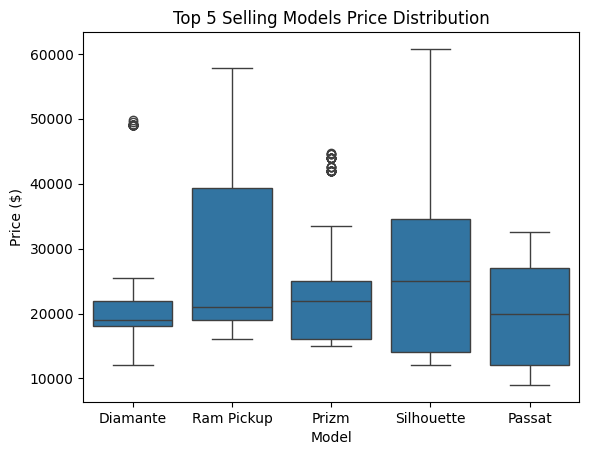

In [29]:
#10) What are the top 5 car models with the highest number of sales, and how does their price distribution look?
top_models = df['Model'].value_counts().head(5).index
sns.boxplot(x='Model', y='Price ($)', data=df[df['Model'].isin(top_models)])
plt.title('Top 5 Selling Models Price Distribution')
plt.show()


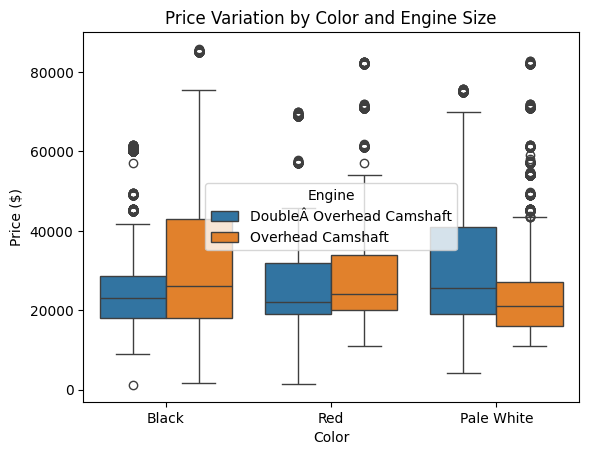

In [30]:
#11) How does car price vary with engine size across different car colors, and which colors have the highest price variation?
sns.boxplot(x='Color', y='Price ($)', hue='Engine', data=df)
plt.title('Price Variation by Color and Engine Size')
plt.show()


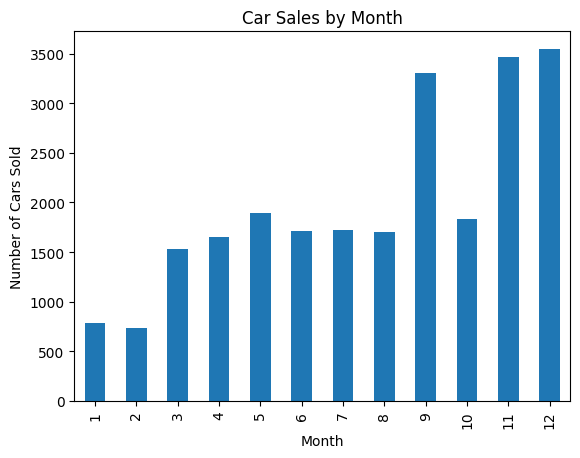

In [31]:
#12) Is there any seasonal trend in car sales based on the date of sale?
df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df['Date'].dt.month

sales_by_month = df['Month'].value_counts().sort_index()
sales_by_month.plot(kind='bar')
plt.title('Car Sales by Month')
plt.xlabel('Month')
plt.ylabel('Number of Cars Sold')
plt.show()


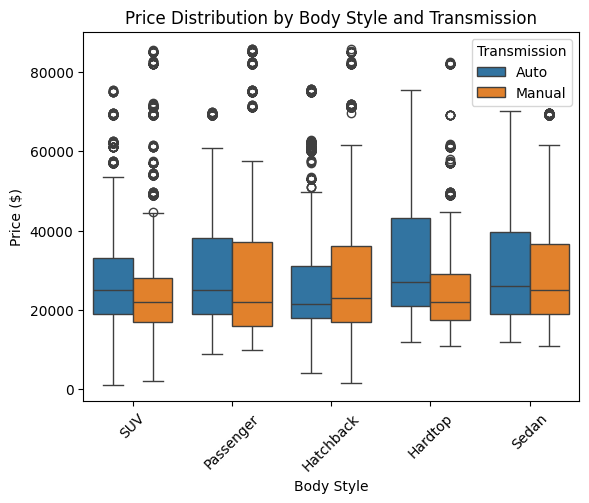

In [32]:
#13) How does the car price distribution change when considering different combinations of body style and transmission type?
sns.boxplot(x='Body Style', y='Price ($)', hue='Transmission', data=df)
plt.title('Price Distribution by Body Style and Transmission')
plt.xticks(rotation=45)
plt.show()


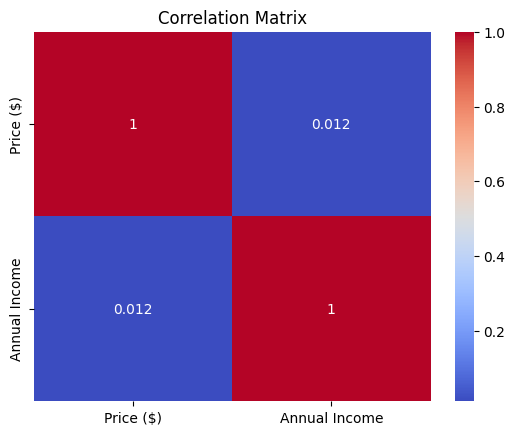

In [33]:
 #14) What is the correlation between car price, engine size, and annual income of customers, and how do these features interact?
 correlation_matrix = df[['Price ($)', 'Annual Income']].corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [34]:
#15) How does the average car price vary across different car models and engine types?
avg_price_model_engine = df.groupby(['Model', 'Engine'])['Price ($)'].mean().sort_values(ascending=False)
avg_price_model_engine


,,Price ($)
Model,Engine,
SC,Overhead Camshaft,61074.818182
Ranger,DoubleÂ Overhead Camshaft,61064.055556
Sable,Overhead Camshaft,61039.770833
Catera,DoubleÂ Overhead Camshaft,56836.933333
LX470,Overhead Camshaft,54037.490196
...,...,...
A4,Overhead Camshaft,12046.220000
Taurus,DoubleÂ Overhead Camshaft,11665.538462
Escort,Overhead Camshaft,11403.866667


EDA 3 – Amazon Sales Data

In [38]:
#1) What is the average rating for each product category?
import pandas as pd

# Load the dataset
df = pd.read_csv('amazon.csv')

# Check basic info
print(df.info())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   product_id           1465 non-null   object
 1   product_name         1465 non-null   object
 2   category             1465 non-null   object
 3   discounted_price     1465 non-null   object
 4   actual_price         1465 non-null   object
 5   discount_percentage  1465 non-null   object
 6   rating               1465 non-null   object
 7   rating_count         1463 non-null   object
 8   about_product        1465 non-null   object
 9   user_id              1465 non-null   object
 10  user_name            1465 non-null   object
 11  review_id            1465 non-null   object
 12  review_title         1465 non-null   object
 13  review_content       1465 non-null   object
 14  img_link             1465 non-null   object
 15  product_link         1465 non-null   object
dtypes: obj

In [41]:
#2) What is the average rating for each product category?
top_rating_count = df.sort_values(['category', 'rating_count'], ascending=[True, False]).groupby('category').head(1)
print(top_rating_count[['category', 'product_name', 'rating_count']])

                                               category  \
900   Computers&Accessories|Accessories&Peripherals|...   
32    Computers&Accessories|Accessories&Peripherals|...   
743   Computers&Accessories|Accessories&Peripherals|...   
653   Computers&Accessories|Accessories&Peripherals|...   
940   Computers&Accessories|Accessories&Peripherals|...   
...                                                 ...   
1279  Home&Kitchen|Kitchen&HomeAppliances|Vacuum,Cle...   
1317  Home&Kitchen|Kitchen&HomeAppliances|WaterPurif...   
1424  Home&Kitchen|Kitchen&HomeAppliances|WaterPurif...   
808   OfficeProducts|OfficePaperProducts|Paper|Copy&...   
950   OfficeProducts|OfficePaperProducts|Paper|Stati...   

                                           product_name  rating_count  
900   Lapster USB 3.0 sata Cable for 2.5 inch SSD an...         817.0  
32    Zoul USB C 60W Fast Charging 3A 6ft/2M Long Ty...         974.0  
743   Amazon Basics Magic Slate 8.5-inch LCD Writing...         401.0  
653

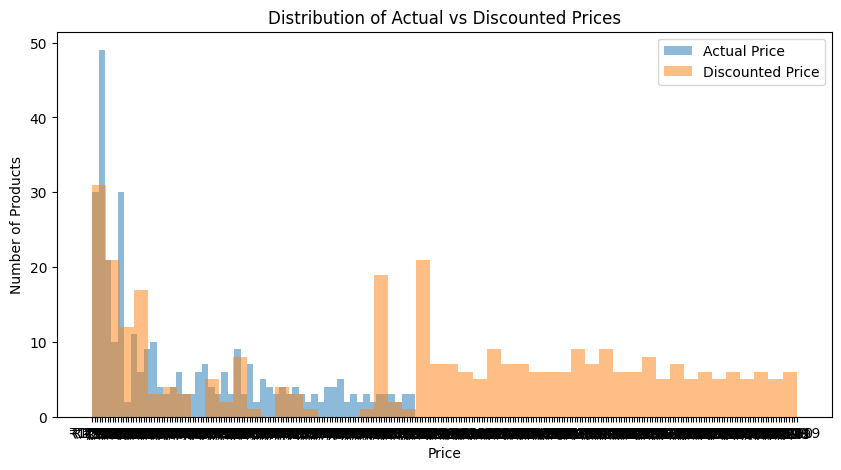

In [42]:
#3) What is the distribution of discounted prices vs. actual prices?
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.hist(df['actual_price'].dropna(), bins=50, alpha=0.5, label='Actual Price')
plt.hist(df['discounted_price'].dropna(), bins=50, alpha=0.5, label='Discounted Price')
plt.legend()
plt.title('Distribution of Actual vs Discounted Prices')
plt.xlabel('Price')
plt.ylabel('Number of Products')
plt.show()


In [46]:
#4) How does the average discount percentage vary across categories?
import pandas as pd

# Load dataset
df = pd.read_csv('amazon.csv')

# Clean and convert 'discount_percentage' to numeric
df['discount_percentage'] = df['discount_percentage'].astype(str).str.replace('%', '', regex=False)
df['discount_percentage'] = pd.to_numeric(df['discount_percentage'], errors='coerce')

# Drop missing values
df = df.dropna(subset=['category', 'discount_percentage'])

# Group by category and calculate average discount
avg_discount = df.groupby('category')['discount_percentage'].mean().sort_values(ascending=False)

print(avg_discount)




category
Computers&Accessories|Accessories&Peripherals|Cables&Accessories|CableConnectionProtectors                            90.0
Electronics|Headphones,Earbuds&Accessories|Earpads                                                                    90.0
Electronics|Mobiles&Accessories|MobileAccessories|Décor|PhoneCharms                                                   90.0
Electronics|Headphones,Earbuds&Accessories|Adapters                                                                   88.0
Computers&Accessories|Accessories&Peripherals|Keyboards,Mice&InputDevices|Keyboard&MiceAccessories|DustCovers         87.5
                                                                                                                      ... 
OfficeProducts|OfficeElectronics|Calculators|Financial&Business                                                        0.0
OfficeProducts|OfficePaperProducts|Paper|Copy&PrintingPaper|ColouredPaper                                              0.0
OfficeP

In [72]:
print(df.columns)

Index(['Artist', 'Track Name', 'Popularity', 'Duration (ms)', 'Track ID'], dtype='object')


In [76]:
#5) What are the most popular product names (by rating count)?
df = pd.read_csv('amazon.csv')
popular_products = df.sort_values('rating_count', ascending=False)[['product_name', 'rating_count']].head(5)
print(popular_products)


                                           product_name rating_count
1279  Eureka Forbes car Vac 100 Watts Powerful Sucti...          992
750        Eveready Red 1012 AAA Batteries - Pack of 10          989
977   Sennheiser CX 80S in-Ear Wired Headphones with...       98,250
1059  Pigeon 1.5 litre Hot Kettle and Stainless Stee...          976
151   Zoul USB Type C Fast Charging 3A Nylon Braided...          974


In [48]:
#6) What are the most popular product keywords?
from collections import Counter
import re

# Combine all about_product descriptions
text = " ".join(df['about_product'].dropna().tolist())

# Keyword extraction
words = re.findall(r'\w+', text.lower())
common_words = Counter(words).most_common(20)
print(common_words)


[('and', 5289), ('the', 4565), ('to', 3846), ('with', 3143), ('for', 2586), ('of', 2106), ('a', 2007), ('your', 1869), ('in', 1622), ('is', 1483), ('1', 1385), ('you', 1355), ('usb', 1230), ('it', 1172), ('on', 1056), ('2', 1025), ('or', 976), ('can', 920), ('cable', 919), ('this', 894)]


In [49]:
#7) What are the most popular product reviews?
popular_reviews = df.sort_values('rating_count', ascending=False)[['review_title', 'review_content']].head(5)
print(popular_reviews)


                                           review_title  \
1279  Decent product,doesn't pick up sand,Ok ok,Must...   
750   Nice .,very good batteries received,Longtevity...   
977   A Quality Sound-Signature but leaves craving f...   
1059  Kettle is good but bottle is not good quality,...   
151   Great Cable, Charging Speeds Could Be Better,G...   

                                         review_content  
1279  Does the job well,doesn't work on sand. though...  
750   Nive,very good batteries received,Like,Good pr...  
977   For those looking for a genuine review & a bri...  
1059  Bottle quality is not good.,Best for hot water...  
151   Not charging as fast as I'd have expected. May...  


In [52]:
#8)What is the correlation between discounted price and rating?

correlation = df['discounted_price'].corr(df['rating'])
print(f"Correlation between discounted price and rating: {correlation:.2f}")




Correlation between discounted price and rating: nan


In [55]:
#9)  What are the Top 5 categories based on the highest average ratings?
top_categories = df.groupby('category')['rating'].mean().sort_values(ascending=False).head(5)
print(top_categories)


category
Computers&Accessories|Tablets                                               4.6
Computers&Accessories|NetworkingDevices|NetworkAdapters|PowerLANAdapters    4.5
Electronics|Cameras&Photography|Accessories|Film                            4.5
Computers&Accessories|Components|Memory                                     4.5
Electronics|HomeAudio|MediaStreamingDevices|StreamingClients                4.5
Name: rating, dtype: float64


In [77]:
#10) Identify any potential areas for improvement or optimization based on the data analysis.
#Ans- Focus more promotions on highly rated but low visibility categories.

#     Work to improve the rating of categories/products with high discounts but poor ratings.

#     Strengthen product description keywords based on most frequent customer language.

#     Push best-rated products through featured listings and ads.


EDA 4 — Spotify Hip-Hop Dataset

In [58]:
import pandas as pd

# Load the dataset
df = pd.read_csv('spotify.csv')

# Quick overview
print(df.info())
print(df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Artist         440 non-null    object
 1   Track Name     440 non-null    object
 2   Popularity     440 non-null    int64 
 3   Duration (ms)  440 non-null    int64 
 4   Track ID       440 non-null    object
dtypes: int64(2), object(3)
memory usage: 17.3+ KB
None
  Artist                               Track Name  Popularity  Duration (ms)  \
0  Drake  Rich Baby Daddy (feat. Sexyy Red & SZA)          92         319191   
1  Drake                                One Dance          91         173986   
2  Drake                       IDGAF (feat. Yeat)          90         260111   
3  Drake     First Person Shooter (feat. J. Cole)          88         247444   
4  Drake            Jimmy Cooks (feat. 21 Savage)          88         218364   

                 Track ID  
0  1yeB8MUNeLo9Ek1UEpsyz6  
1 

In [60]:
#1) Check for null values and duplicates
print("Null values:\n", df.isnull().sum())
print("\nDuplicate rows:", df.duplicated().sum())

# Drop duplicates
df = df.drop_duplicates()


Null values:
 Artist           0
Track Name       0
Popularity       0
Duration (ms)    0
Track ID         0
dtype: int64

Duplicate rows: 0


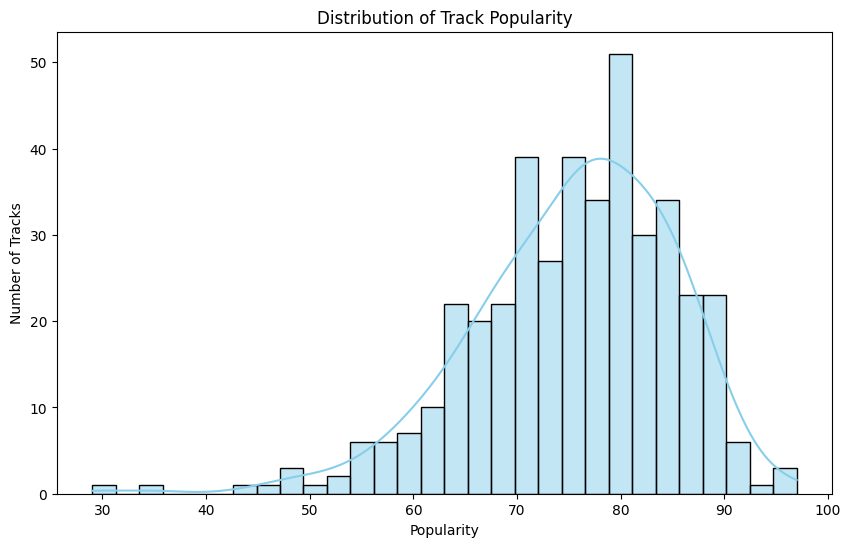

In [61]:
#2) What is the distribution of track popularity?
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.histplot(df['Popularity'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Track Popularity')
plt.xlabel('Popularity')
plt.ylabel('Number of Tracks')
plt.show()


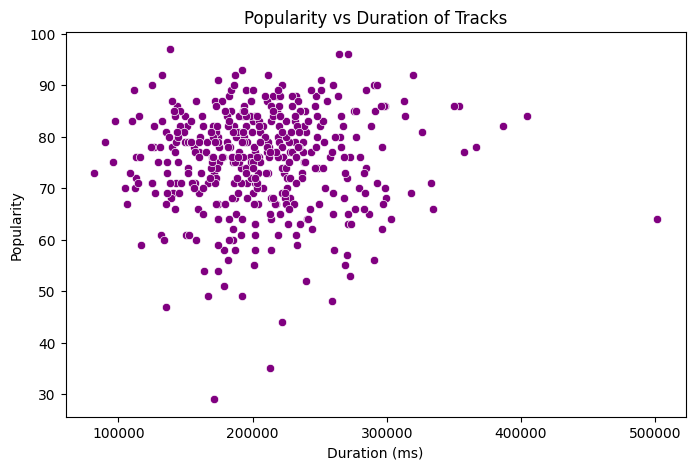

In [62]:
#3) Is there a relationship between popularity and duration?
plt.figure(figsize=(8,5))
sns.scatterplot(x='Duration (ms)', y='Popularity', data=df, color='purple')
plt.title('Popularity vs Duration of Tracks')
plt.xlabel('Duration (ms)')
plt.ylabel('Popularity')
plt.show()


In [63]:
#4) Which artist has the highest number of tracks?
top_artist = df['Artist'].value_counts().idxmax()
top_count = df['Artist'].value_counts().max()

print(f"The artist with the most tracks is '{top_artist}' with {top_count} tracks.")


The artist with the most tracks is 'Drake' with 17 tracks.


In [64]:
#5) What are the 5 least popular tracks?
least_popular = df.sort_values('Popularity').head(5)
print(least_popular[['Artist', 'Track Name', 'Popularity']])


             Artist                     Track Name  Popularity
207          Pressa  Attachments (feat. Coi Leray)          29
231   Justin Bieber                     Intentions          35
413  French Montana                Splash Brothers          44
225        Lil Baby                  On Me - Remix          47
407     Wyclef Jean      911 (feat. Mary J. Blige)          48


In [65]:
#6) Among the top 5 artists (by track count), who has the highest average popularity?
top_5_artists = df['Artist'].value_counts().head(5).index
top_5_df = df[df['Artist'].isin(top_5_artists)]

avg_popularity = top_5_df.groupby('Artist')['Popularity'].mean().sort_values(ascending=False)
print(avg_popularity)


Artist
21 Savage    83.800000
Eminem       83.636364
Drake        82.882353
JAY-Z        77.900000
Lil Nas X    75.900000
Name: Popularity, dtype: float64


In [66]:
#7) What are the most popular tracks from top 5 artists?
most_popular_tracks = top_5_df.sort_values(['Artist', 'Popularity'], ascending=[True, False])
top_tracks = most_popular_tracks.groupby('Artist').first()
print(top_tracks[['Track Name', 'Popularity']])


                                        Track Name  Popularity
Artist                                                        
21 Savage                                   redrum          96
Drake      Rich Baby Daddy (feat. Sexyy Red & SZA)          92
Eminem                                  Without Me          90
JAY-Z                              Ni**as In Paris          86
Lil Nas X                        THATS WHAT I WANT          81


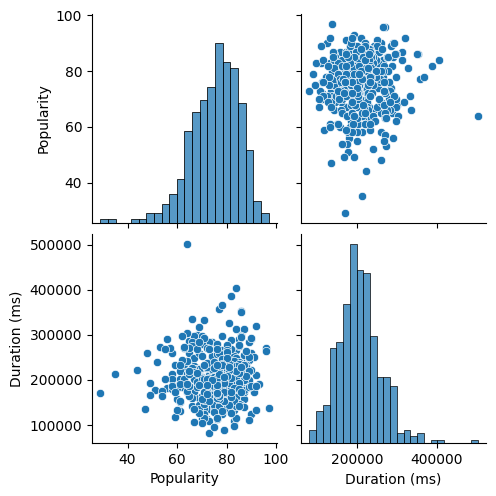

In [67]:
#8) Pair plot to visualize relationships between numerical features
sns.pairplot(df[['Popularity', 'Duration (ms)']])
plt.show()


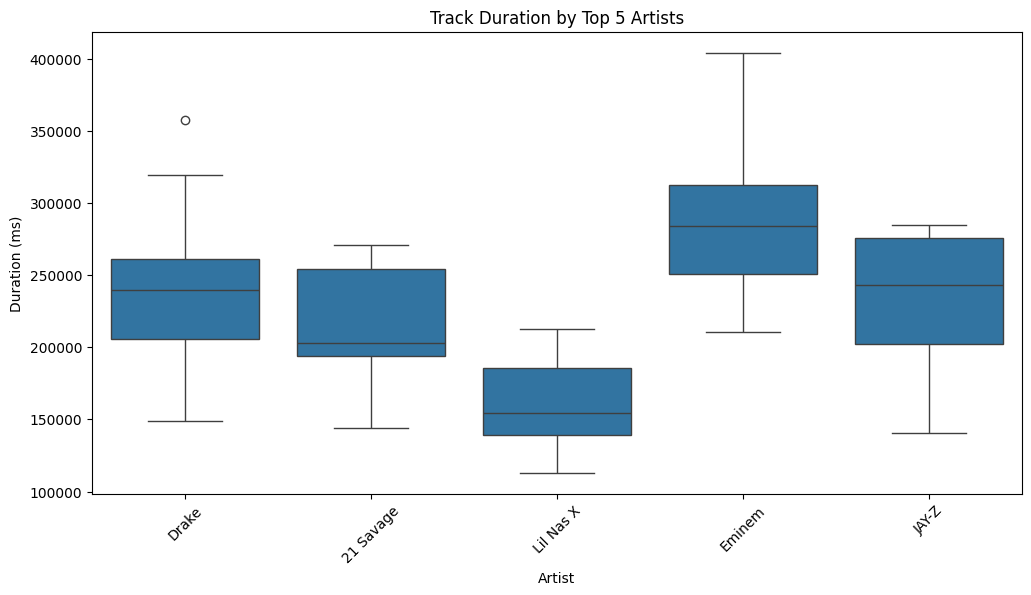

In [68]:
#9) Does track duration vary significantly across top artists?
plt.figure(figsize=(12,6))
sns.boxplot(x='Artist', y='Duration (ms)', data=top_5_df)
plt.xticks(rotation=45)
plt.title('Track Duration by Top 5 Artists')
plt.show()


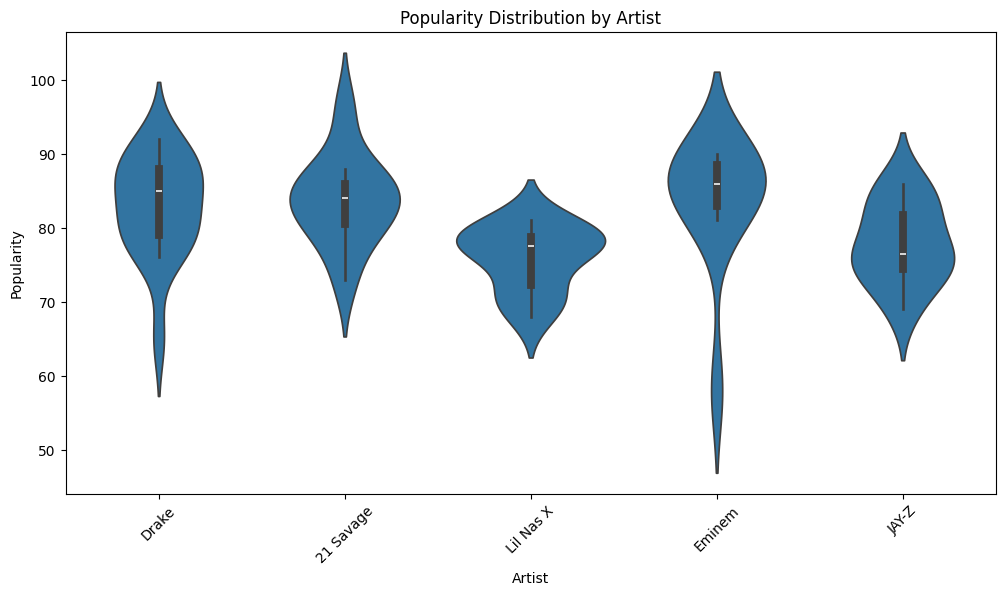

In [69]:
#10) How does popularity vary among top 5 artists?
plt.figure(figsize=(12,6))
sns.violinplot(x='Artist', y='Popularity', data=top_5_df)
plt.xticks(rotation=45)
plt.title('Popularity Distribution by Artist')
plt.show()
